In [ ]:
# 필요라이브러리 로드
from matplotlib import font_manager , rc 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 
rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
rc('axes', unicode_minus=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 프리시즌 데이터 분석

In [ ]:
#프리시즌 데이터로드
preseason_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KBO_prediction_data/Pre_Season_Batter.csv')
#정규시즌 데이터로드
regular_season_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KBO_prediction_data/Regular_Season_Batter.csv')
#데이터크기 확인
print(preseason_df.shape)
#데이터 상단 출력 
display(preseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


In [ ]:
#데이터 기초통계량 확인
pd.set_option('display.max_columns', None)
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,2.430725,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,2.698122,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,4.000000,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,24.000000,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


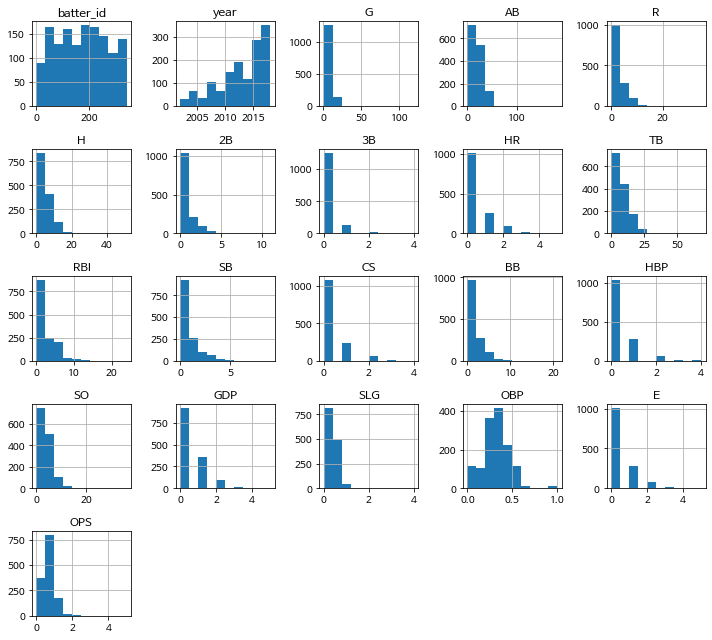

In [ ]:
#데이터 시각화
preseason_df.hist(figsize=(10,9))
plt.tight_layout() # 그래프 간격 설정
plt.show()

- 대부분의 값이 0에 가까운 값을 기록한 것을 확인
- 프리시즌의 경기 수가 적어서 나타나는 현상이라고 추측됨
- 연도의 분포를 보면 과거로 갈 수록 기록의 수가 적어지는 것을 확인

**프리시즌 데이터는 그 양이 부족한 상황임을 알 수 있음. 정규시즌 데이터와 비교해 객관적으로 보기**

In [ ]:
#정규시즌 데이터에서 2002년 이후의 연도별기록된 선수의 수
regular_count=regular_season_df.groupby('year')['batter_name'].count().rename('regular')

#프리시즌 데이터에서 2002년 이후의 연도별기록된 선수의 수
preseason_count=preseason_df.groupby('year')['batter_name'].count().rename('preseason')

#합치기. axis=1은 열방향(좌우)
pd.concat([regular_count,preseason_count, np.round(preseason_count/regular_count,2).rename('ratio')],axis=1).transpose().loc[:,2002:] # 2002년부터 보기

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [ ]:
regular_count

year
1993      1
1994      2
1995      1
1996      7
1997      8
1998     10
1999     14
2000     20
2001     32
2002     43
2003     54
2004     68
2005     73
2006     85
2007     98
2008    115
2009    124
2010    130
2011    151
2012    174
2013    194
2014    186
2015    207
2016    213
2017    217
2018    227
Name: regular, dtype: int64

In [ ]:
pd.concat([regular_count,preseason_count, np.round(preseason_count/regular_count,2).rename('ratio')],axis=1)

,regular,preseason,ratio
year,,,
1993,1,NaN,NaN
1994,2,NaN,NaN
1995,1,NaN,NaN
1996,7,NaN,NaN
1997,8,NaN,NaN
1998,10,NaN,NaN
1999,14,NaN,NaN
2000,20,NaN,NaN
2001,32,NaN,NaN


In [ ]:
# 두 데이터에 공통으로 존재하는 선수

#타자의 이름과 연도를 이용해 새로운 인덱스를 생성
regular_season_df['new_idx']=regular_season_df['batter_name']+regular_season_df['year'].apply(str)
preseason_df['new_idx']=preseason_df['batter_name']+preseason_df['year'].apply(str)

#새로운 인덱스의 교집합
intersection_idx=list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))
#ket_point: intersaction을 활용한 교집합 

#교집합에 존재하는 데이터만 불러오기
regular_season_new=regular_season_df.loc[regular_season_df['new_idx'].apply(lambda x:x in intersection_idx)]
regular_season_new=regular_season_new.sort_values(by='new_idx').reset_index(drop=True)

#비교를 위한 인덱스 정렬
preseason_new=preseason_df.loc[preseason_df['new_idx'].apply(lambda x:x in intersection_idx)]
preseason_new=preseason_new.sort_values(by='new_idx').reset_index(drop=True)

#검정코드
print(preseason_new.shape, preseason_new.shape)
sum(preseason_new['new_idx']==regular_season_new['new_idx'])

(1358, 30) (1358, 30)


1358

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


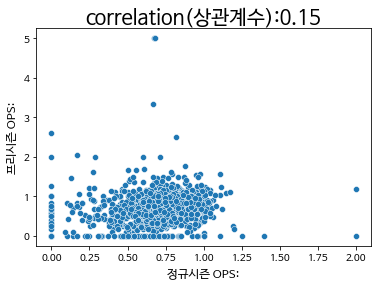

In [ ]:
#정규시즌과 프리시즌의 상관관계 계산
correlation=regular_season_new["OPS"].corr(preseason_new["OPS"])
sns.scatterplot(regular_season_new["OPS"], preseason_new["OPS"])
plt.title('correlation(상관계수):'+str(np.round(correlation,2)), fontsize=20)
plt.xlabel('정규시즌 OPS:', fontsize=12)
plt.ylabel('프리시즌 OPS:', fontsize=12)
plt.show()

## 탐색적 데이터 분석을 통해 알 수 있는 점
1. 프리시즌 데이터의 경기 기록 수는 매우 적으므로 그 구성 역시 정규시즌 데이터와 차이가 있을 수 있음
2. 프리시즌 데이터와 정규시즌 데이터 간 상관관계가 매우 낮음

따라서 **이번 대회의 예측은 정규시즌의 성적이므로 더 정밀한 결과를 위해 프리시즌 데이터를 데이터 분석에서 제외**

# 정규시즌 데이터 분석

In [ ]:
#기초통계량 확인
display(regular_season_df.shape, regular_season_df.head(), regular_season_df.describe())

(2454, 30)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902,가르시아2018
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2011
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686,강경학2014
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673,강경학2015
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489,강경학2016


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,84.279136,27.788509,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,82.854200,29.602966,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,56.000000,17.000000,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,146.000000,44.000000,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,377.000000,146.000000,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


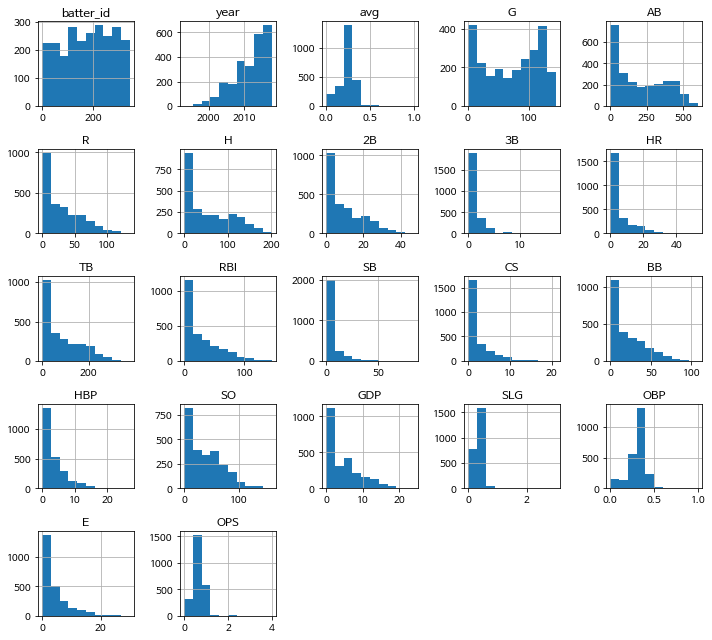

In [ ]:
#시각화 작업
regular_season_df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

- 몇몇 변수가 0에 치우쳐져 있긴 하지만 프리시즌 데이터와 비교했을 때 값의 범위가 더 넓어짐
- 예측 대상인 OPS를 보면 대부분의 값이 1 이하인 것을 확인. 상자 그림을 통해 좀 더 자세히 살펴보기


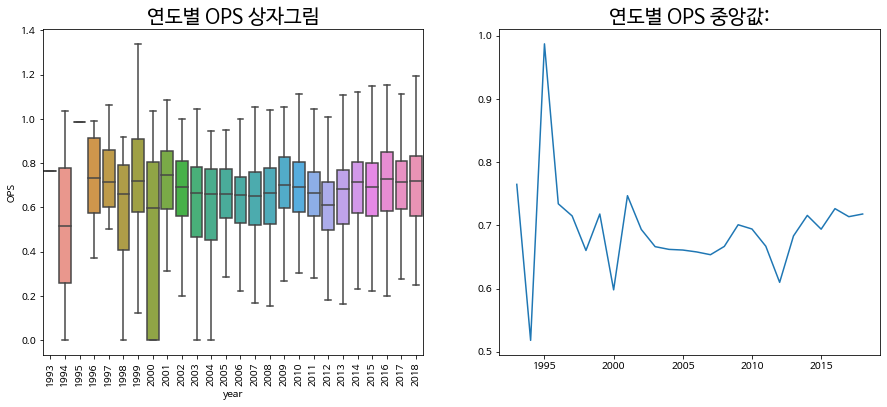

In [ ]:
# OPS를 시각화

plt.figure(figsize=(15,6))
plt.subplot(1,2,1) #1행 2열의 첫번쨰 (1행 1열) 그래프
g= sns.boxplot(x='year', y='OPS', data=regular_season_df, showfliers=False)
g.set_title('연도별 OPS 상자그림', size=20)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.subplot(1,2,2)
plt.plot(regular_season_df.groupby('year')['OPS'].median()) #OPS 값이 한쪽으로 치우쳐 있으므로 중앙값으로 평균을 낸다
plt.title('연도별 OPS 중앙값:', size=20)
plt.show()

In [ ]:
#2000년도 이전의 변동폭이 크기 때문에 좀더 자세히 살펴본다
pd.crosstab(regular_season_df['year'], 'count').T
#2000년 이전의 데이터 수가 작아서 변동성이 컸음을 알수있음

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,54,68,73,85,98,115,124,130,151,174,194,186,207,213,217,227


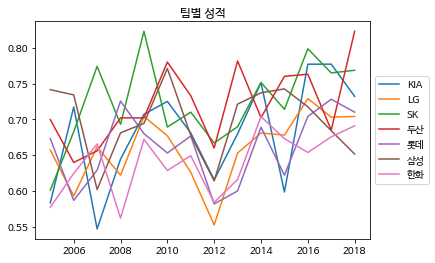

In [ ]:
# 팀별/연도별 OPS
# 선수들의 성적은 팀의 성적에도 영향을 받을 수 있기 때문

#연도별 팀의 OPS 중앙값 계산
med_OPS=regular_season_df.pivot_table(index=['team'], columns='year', values="OPS", aggfunc="median")

#2005년 이후에 결측치가 존재 하지 않은 팀만 확인
team_idx=med_OPS.loc[:,2005:].isna().sum(axis=1)<=0 # True = 1 False = 0

plt.plot(med_OPS.loc[team_idx,2005:].T)
plt.legend(med_OPS.loc[team_idx,2005:].T.columns, loc='center left', bbox_to_anchor=(1,0.5)) #그래프 범례를 그래프 밖에 위치
plt.title('팀별 성적')
plt.show()

- 신생팀이 아닌 과거의 데이터를 가지고 있는 팀들을 대상으로 연도별 팀 성적 비교
- 성적이 계속 달라지고 순위도 계속 변동되는 것을 확인

In [ ]:
med_OPS=regular_season_df.pivot_table(index=['team'], columns='year', values="OPS", aggfunc="median")
med_OPS

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
team,,,,,,,,,,,,,,,,,,,,,,,,,,
KIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849337,0.829906,0.681098,0.710473,0.583333,0.717176,0.546944,0.644474,0.707000,0.725000,0.680963,0.615420,0.679763,0.751196,0.598500,0.777000,0.777000,0.7320
KT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.643561,0.634500,0.710791,0.6550
LG,NaN,0.000000,NaN,0.476212,0.679836,0.509843,0.637173,0.689250,0.698978,0.645345,0.674368,0.594543,0.657000,0.593128,0.661500,0.622015,0.704000,0.677000,0.626000,0.552501,0.653000,0.680809,0.678000,0.729000,0.703000,0.7040
NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.652500,0.636742,0.711000,0.703000,0.705000,0.6000
OB,NaN,NaN,NaN,NaN,0.615797,0.727667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.596491,0.393000,0.636000,0.494000,0.601000,0.682591,0.774000,0.693000,0.822977,0.689176,0.710000,0.666953,0.689636,0.751500,0.714000,0.798500,0.764796,0.7685
넥센,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.636166,0.623000,0.589000,0.671000,0.792032,0.753000,0.800500,0.743500,0.7650
두산,NaN,NaN,NaN,NaN,NaN,NaN,0.853830,0.739755,0.695808,0.762809,0.643209,0.672643,0.699575,0.639750,0.656000,0.702000,0.701938,0.780000,0.733000,0.660000,0.781500,0.702330,0.760000,0.763000,0.685000,0.8230
롯데,NaN,NaN,NaN,NaN,NaN,NaN,1.124961,0.453390,0.577847,0.577000,0.638655,0.662041,0.673000,0.586748,0.629000,0.725455,0.680000,0.653000,0.676715,0.581845,0.600000,0.689000,0.622000,0.704000,0.728000,0.7100


In [ ]:
# 키와 몸무게가 성적에 연관이 있는지 확인

import re 
regular_season_df['weight']=regular_season_df['height/weight'].apply(lambda x: int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x )

regular_season_df['height']=regular_season_df['height/weight'].apply(lambda x: int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x )

print(regular_season_df['height/weight'][0], regular_season_df['weight'][0],regular_season_df['height'][0])

177cm/93kg 93.0 177.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


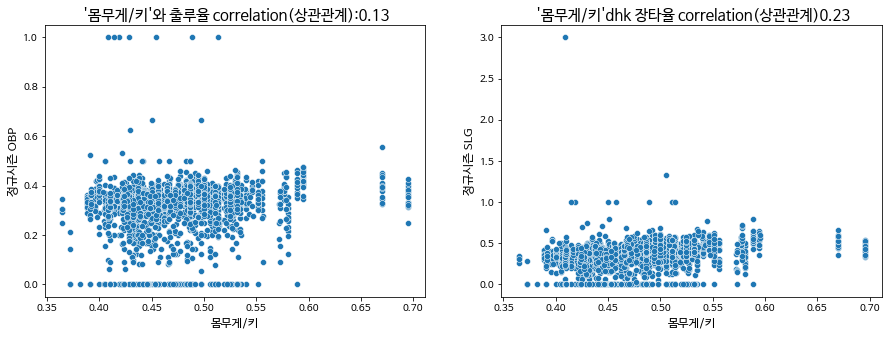

In [ ]:
#몸무게/키 계산
regular_season_df['weight_per_height']=regular_season_df['weight']/ regular_season_df['height']
plt.figure(figsize=(15,5)) #그래프 조정
plt.subplot(1,2,1)

#비율과 출루율 상관관계
correlation= regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['OBP'])
plt.title(" '몸무게/키'와 출루율 correlation(상관관계):"+str(np.round(correlation,2)),fontsize=15)
plt.ylabel('정규시즌 OBP', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)

#비율과 장타율 상관관계
plt.subplot(1,2,2)
correlation=regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(regular_season_df['weight_per_height'],regular_season_df['SLG'])
plt.title(" '몸무게/키'dhk 장타율 correlation(상관관계)"+str(np.round(correlation,2)), fontsize=15)
plt.ylabel('정규시즌 SLG', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.show()

- 데이터는 선형적인 모습을 띠지 않으며 그 분포가 매우 고르게 분포돼있음
- 몸무게 및 키가 장타율과 출루율에 큰 영향을 끼치지 않음

In [ ]:
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [ ]:
# 포지션 세부적으로 분리하기
#postion
regular_season_df['pos']=regular_season_df['position'].apply(lambda x:x.split('(')[0] if pd.notnull(x) else x)

#우타,좌타,양타 : 손잡이
regular_season_df['hit_way']=regular_season_df['position'].apply(lambda x: x[-3:-1] if pd.notnull(x) else x)

print(regular_season_df['position'][0], regular_season_df['pos'][0], regular_season_df['hit_way'][0])


내야수(우투우타) 내야수 우타


내야수
외야수
포수


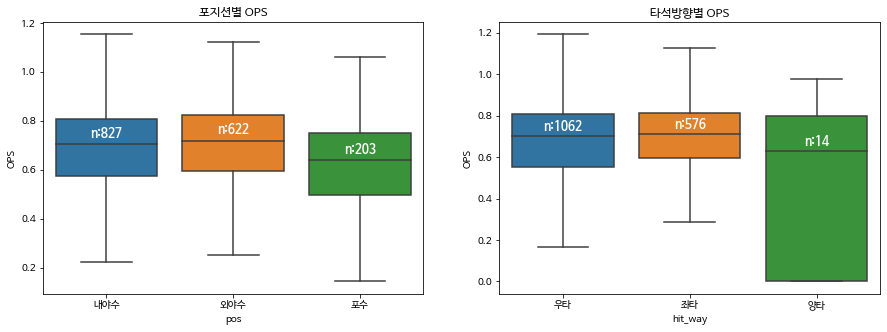

In [ ]:
plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)
ax= sns.boxplot(x='pos', y='OPS', data=regular_season_df,
                showfliers=False) # 박스 범위 벗어난 아웃라이어 표시하지 않기

#position별 ops 중앙값
median= regular_season_df.groupby('pos')['OPS'].median().to_dict() #{'내야수': 0.706, '외야수': 0.7190000000000001, '포수': 0.639}

#position 별 관측치 수 -> 그래프에 넣을 값
nobs=regular_season_df['pos'].value_counts().to_dict()  #{'내야수': 827, '외야수': 622, '포수': 203}

#키 값을 'n:값' 형식으로 변환하는 코드
for key in nobs: nobs[key] = "n:"+str(nobs[key])
    
#그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]  #['내야수', '외야수', '포수']


#ax안에 텍스트 위치와 내용 넣기
for label in ax.get_xticklabels(): #x축 인자 즉, 내야수,외야수,포수를 차례대로 label 넣는다
#     print(xticks_labels.index(label.get_text()))  # 0,1,2 차례대로
#     print(label.get_text())                       #내야수 외야수 포수
    
    ax.text(xticks_labels.index(label.get_text()), #x의 위치--> 숫자로 인덱스가 출력
           median[label.get_text()]+0.03,          #y의 위치 
            nobs[label.get_text()],                #들어갈 텍스트 내용
           horizontalalignment='center', size='large', color='w', weight='semibold')
    print(label.get_text())
ax.set_title('포지션별 OPS')

plt.subplot(1,2,2)
ax= sns.boxplot(x='hit_way', y='OPS', data=regular_season_df, showfliers=False)

#타자 방향별 OPS 중앙값
median=regular_season_df.groupby('hit_way')['OPS'].median().to_dict() 

#타자 방향 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()

#키 값을 'n:값' 형식으로 변환
for key in nobs: nobs[key] = 'n:'+str(nobs[key])

#그래프의 xticks text 값 얻기
xticks_labels=[item.get_text() for item in ax.get_xticklabels()] #hit_way의 인덱스가 리스트 형식으로 묶인다

#tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(
    xticks_labels.index(label.get_text()),
    median[label.get_text()]+0.03,
    nobs[label.get_text()], horizontalalignment='center', size= 'large',
    color='w', weight='semibold')
ax.set_title('타석방향별 OPS')
plt.show()

# 포지션별 OPS 분석
- 내야수와 외야수의 성적은 큰 차이 없음
- 포수를 제외하고 OPS 성적에는 포지션의 영향이 크지 않음

# 치는 손에 따른 OPS 분석
- 왼손, 오른손 큰 차이 없음
- 양손은 OPS가 낮은 경향을 보이나 이는 관측치가 적기 때문에 신뢰하기 힘듦



In [ ]:
dict = {'내야수': 827, '외야수': 622, '포수': 203}
for key in dict: dict[key] = "n:"+str(dict[key]) 
dict

{'내야수': 'n:827', '외야수': 'n:622', '포수': 'n:203'}

In [ ]:
regular_season_df['career'].head()

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [ ]:
# 커리어 변수를 이용하여 외/내국인 차이를 탐색

#career를 split
foreign_country = regular_season_df['career'].apply(lambda x:x.replace('-','').split(' ')[0]) # -을 공백으로 대체

#외국인만 추출
foreign_country_list= list(set(foreign_country.apply(lambda x:np.nan if '초' in x else x))) #초가 있으면 nan으로 처리하고 그게 아니라면 x출력
                                                                                              #nan이 1개인 이유 : set함수  
#결측치 처리 
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['쿠바', '도미니카삼성', '캐나다', '도미니카', '네덜란드', '미국']

['쿠바', '도미니카삼성', '캐나다', '도미니카', '네덜란드', '미국']

In [ ]:
regular_season_df['country']=foreign_country
regular_season_df['country']=regular_season_df['country'].apply(lambda x: x if pd.isnull(x) else ('foreign' if x in foreign_country_list else 'korean'))
regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


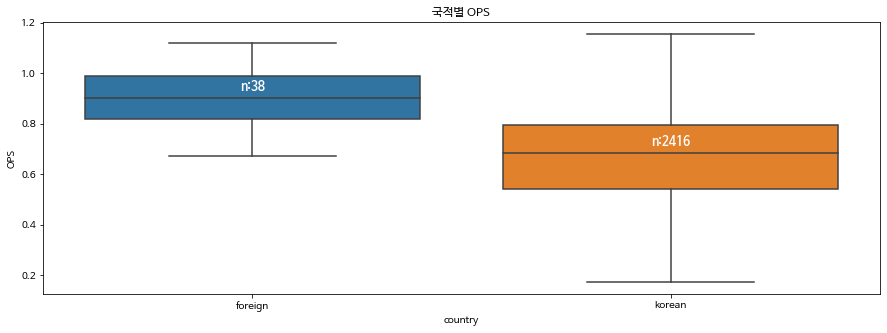

In [ ]:
plt.figure(figsize=(15,5))
ax= sns.boxplot(x='country', y='OPS', data=regular_season_df, showfliers=False)

#국적별 OPS 중앙값 dict
median= regular_season_df.groupby(['country'])['OPS'].median().to_dict()

#내외국인 관측치 수
nobs = regular_season_df['country'].value_counts().to_dict()

#키 값을 n:값 형태로 변경
for key in nobs : nobs[key] = 'n:'+str(nobs[key]) #['foreign', 'korean']

#그래프의 Xticks text 값 얻기
xticks_labels=[item.get_text() for item in ax.get_xticklabels()]
for label in ax.get_xticklabels():
    ax.text(
    xticks_labels.index(label.get_text()),
        median[label.get_text()]+0.03,
        nobs[label.get_text()],
        horizontalalignment='center', size='large', color='w', weight='semibold')
ax.set_title('국적별 OPS')
plt.show()


- 평균적으로 내국인 선수들보다 OPS 성적이 좋은 경향
- 외국인 선수의 수가 많지는 않지만 명확한 차이

In [ ]:
regular_season_df['starting_salary'].value_counts()

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
4000만원       62
12000만원      62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
33000만원      10
6500만원       10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


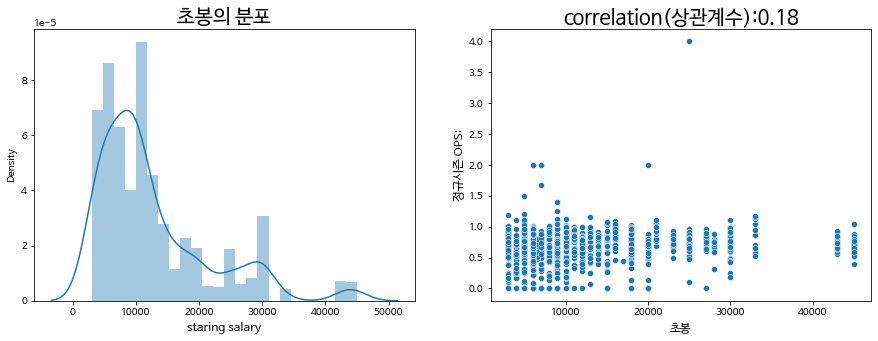

In [ ]:
#외국인은 이전에 성적을 확인했으므로 만원 단위를 가진 첫 연봉의 데이터만 살펴보기
#결측치라면 그대로 0으로 두고, 만원이 포함된다면 숫자만 뽑아서 초봉으로 넣어준다.
#그외 만원 단위가 아닌 초봉은 결측치로 처리한다.

regular_season_df['starting_salary']=regular_season_df['starting_salary'].apply(lambda x:x if pd.isnull(x) else(int(re.findall('\d+',x)[0]) if '만원' in x else np.nan))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
b=sns.distplot(regular_season_df['starting_salary'].\
              loc[regular_season_df['starting_salary'].notnull()], hist=True)
b.set_xlabel('staring salary', fontsize=12)
b.set_title('초봉의 분포', fontsize=20)

# 정규시즌 OPS와 초봉의 상관관계
plt.subplot(1,2,2)
correlation=regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b=sns.scatterplot(x=regular_season_df['starting_salary'], y=regular_season_df['OPS'])
b.axes.set_title('correlation(상관계수):'+str(np.round(correlation,2)), fontsize=20)
b.set_ylabel('정규시즌 OPS:',fontsize=12)
b.set_xlabel("초봉",fontsize=12)
plt.show()

- 첫 연봉과 성적은 큰 상관성을 보이지 않음

# 정규시즌 탐색적 데이터 분석 결과 종합
- OPS성적과 높은 연관성을 띠는 주어진 데이터에서의 변수가 매우 부족
- 외국인 OPS가 높은 경향은 있으나 매해 명단이 달라지며 그 숫자도 부족해 분석에 적용하기는 어려움
- 따라서 주어진 데이터를 그대로 활용하는 것이 아니라 조금 다른 차원의 접근이 필요

In [ ]:
# 일별 데이터 분석

day_by_day_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KBO_prediction_data/Regular_Season_Batter_Day_by_Day_b4.csv')
display(day_by_day_df.shape, day_by_day_df.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [ ]:
#날짜(date)를 '.'을 기준으로 나누고 첫 번째 값을 월(month)로 지정
day_by_day_df['month']=day_by_day_df['date'].apply(lambda x:str(x).split('.')[0]) #숫자는 split 안됨, str로 변경 후 사용

#각 연도의 월별 평균 누적 타율(avg2) 계산
agg_df= day_by_day_df.groupby(['year','month']).mean().reset_index()
agg_df

#피벗 데이털로 재구성하기
agg_df=day_by_day_df.pivot_table(index='month', columns='year', values='avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


- 3, 10월에 결측치가 존재
- 연도마다 시즌의 시작일과 종료일이 다르기 때문이라고 추측

year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


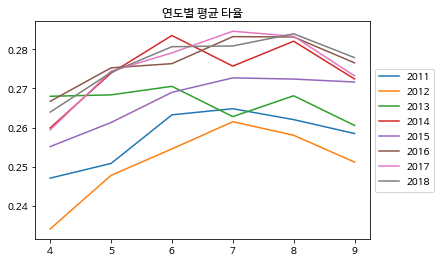

In [ ]:
#그래프의 간소화를 위해 결측치가 있는 3월과 10월제외한다.
display(agg_df.iloc[2:,10:])
plt.plot(agg_df.iloc[2:,10:]) #2011~2018년도
plt.legend(agg_df.iloc[2:,10:].columns, loc='center left', bbox_to_anchor=(1,0.5)) #범례 그래프 밖에 위치
plt.title('연도별 평균 타율')
plt.show()

# 각 연도의 월별 성적 변화 데이터 분석 결과
- 시즌 시작 직후에는 대부분 성적이 높지 않지만 5~6월이 돼서는 안정화

**이 대회가 상반기까지의 성적을 예측하는 대회라는 점에서 모델링에 매우 중요한 단서**

# 탐색적 데이터 분석 요약
- 프리시즌 데이터는 데이터양에 있어 충분하지 못함
- 정규시즌에 있는 선수의 기록이 프리시즌에는 없음
- 결정적으로 프리시즌 데이터와 정규시즌 데이터 간에 상관성이 낮음

**따라서 프리시즌 데이터는 사용하지 않음**

- 정규시즌 일별 데이터에서 연도별 월별 선수들의 누적 성적의 변화를 파악
- OPS 성적 평균이 월별로 달라지고 7월 이후에 성적이 수렴되는 것을 확인

**이러한 결론을 바탕으로 데이터 전처리 진행**

---

# 데이터 전처리

In [ ]:
pd.DataFrame(regular_season_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx,weight,height,weight_per_height,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,24,0,802,0,802,0,1076,26,0,802,802,802,802,802,0


In [ ]:
# 결측치 처리 및 데이터 오류 처리

# 수치형 타입의 변수 저장
numberics =['int16','int32','int64','float16','float32','float64']
num_cols=regular_season_df.select_dtypes(include=numberics).columns # select_dtypes: 열 dtype을 기반으로 DataFrame 열의 하위 집합을 반환
# name, county 없음

In [ ]:
regular_season_df[num_cols]

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,starting_salary,OPS,weight,height,weight_per_height
0,0,2018,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,NaN,0.902,93.0,177.0,0.525424
1,1,2011,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,10000.0,0.000,72.0,180.0,0.400000
2,1,2014,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,10000.0,0.686,72.0,180.0,0.400000
3,1,2015,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,10000.0,0.673,72.0,180.0,0.400000
4,1,2016,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,10000.0,0.489,72.0,180.0,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,2014,0.000,5,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,0,4000.0,0.000,82.0,181.0,0.453039
2450,344,2015,0.000,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0,4000.0,0.000,82.0,181.0,0.453039
2451,344,2016,0.000,11,10,2,0,0,0,0,0,0,0,1,0,0,5,0,0.000,0.000,0,4000.0,0.000,82.0,181.0,0.453039
2452,344,2017,0.291,60,117,18,34,6,2,1,47,16,4,0,10,3,38,2,0.402,0.359,4,4000.0,0.761,82.0,181.0,0.453039


In [ ]:
# 행 기준
regular_season_df[num_cols].isna().sum()

batter_id               0
year                    0
avg                    26
G                       0
AB                      0
R                       0
H                       0
2B                      0
3B                      0
HR                      0
TB                      0
RBI                     0
SB                      0
CS                      0
BB                      0
HBP                     0
SO                      0
GDP                     0
SLG                    26
OBP                    24
E                       0
starting_salary      1076
OPS                    26
weight                802
height                802
weight_per_height     802
dtype: int64

In [ ]:
# 열 기준
regular_season_df[num_cols].isna().sum(axis=1)

0       1
1       0
2       0
3       0
4       0
       ..
2449    0
2450    0
2451    0
2452    0
2453    0
Length: 2454, dtype: int64

In [ ]:
# 수치형 타입 변수 중 결측치가 하나라도 존재하는 행 출력
# isna( ).sum(axis=1 ) -) 열 기준의 결측치 개수
# df .loc[ 1를 통해 결측치 0개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[num_cols].isna().sum(axis=1)>0 , num_cols].head() # True = 1 False = 0

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,starting_salary,OPS,weight,height,weight_per_height
0,0,2018,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519000,0.383000,9,NaN,0.902000,93.0,177.0,0.525424
12,138,2005,0.127,39,63,9,8,2,0,0,10,3,1,2,7,4,15,1,0.158730,0.256757,3,NaN,0.415487,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,7,0,1,0,8,2,14,0,0.194444,0.326087,4,NaN,0.520531,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,0,0,0,0,0,0,2,1,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN


- 변수 G는 선수가 뛴 경기 수
- 뛴 경기가 적어 성적을 산출하지 못하는 경우에 결측치가 발생하는 것이 확인

In [ ]:
#수치형 변수에 포함되는 데이터 타입 선정
numberics =['int16','int32','int64','float16','float32','float64']

#정규시즌 데이터에서 결측치를 0으로 채우기
regular_season_df[regular_season_df.select_dtypes(include=numberics).columns]=regular_season_df[regular_season_df.select_dtypes(include=numberics).columns].fillna(0)

#일별 데이터에서 결측치를 0으로 채우기
day_by_day_df[day_by_day_df.select_dtypes(include=numberics).columns]=day_by_day_df[day_by_day_df.select_dtypes(include=numberics).columns].fillna(0)

#프리시즌 데이터에서 결측치를 0으로 채우기
preseason_df[preseason_df.select_dtypes(include=numberics).columns]=preseason_df[preseason_df.select_dtypes(include=numberics).columns].fillna(0)